In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv(r"survey.csv")

##  1- Data Exploration

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [4]:
df.shape

(1259, 27)

In [5]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## 2- Data Cleaning

In [8]:
df = df.drop(columns =['comments','Timestamp','state'],axis=1)

In [9]:
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace= True)

In [10]:
df.groupby('treatment')['work_interfere'].apply(lambda x: x.isnull().value_counts())


treatment  No   
No         False    362
           True     260
Yes        False    633
           True       4
Name: work_interfere, dtype: int64

In [11]:
df.loc[df['work_interfere'].isnull() & (df['treatment'] == 'No'), 'work_interfere'] = 'Not Applicable'


In [12]:
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [13]:
df['Gender']=df['Gender'].str.lower()
df['Gender']=df['Gender'].str.strip()

In [14]:
df['Gender'].unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'androgyne',
       'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'man', 'trans woman', 'msle', 'neuter',
       'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [15]:
def gender_cleaned (gender):

    male = ['male', 'man', 'm', 'mail', 'malr', 'cis male', 'cis man', 'male-ish','trans-female','Guy (-ish) ^_^',
        'something kinda male?','cis male','maile', 'mal', 'male (cis)', 'Make', 'male', 'man', 'msle', 'mail',
        'ostensibly male, unsure what that really means','neuter']
    female = ['female', 'woman', 'f', 'femake', 'cis female', 'cis woman','femail', 'female (cis)'
         ,'femake','female/woman']

    for g in gender :
        if g in male:
           return 'Male'
        elif g in female :
           return 'Female'
    return 'Male'

df['Gender']=df['Gender'].apply(gender_cleaned)

In [16]:
df['Gender'].value_counts()

Gender
Male      1012
Female     247
Name: count, dtype: int64

In [17]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [18]:
filt = (df['Age']>=18) & (df['Age']<=70)
df=df[filt]          

In [19]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [20]:
range_to_number = {
    '1-5': 3,             
    '6-25': 15,           
    '26-100': 63,         
    '100-500': 300,       
    '500-1000': 750,      
    'More than 1000': 1500 
}
df['no_employees'] = df['no_employees'].map(range_to_number)
df['no_employees'] = df['no_employees'].astype(int)


In [21]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## 3- Data Visuallization

Text(0.5, 1.0, 'Age Distribution')

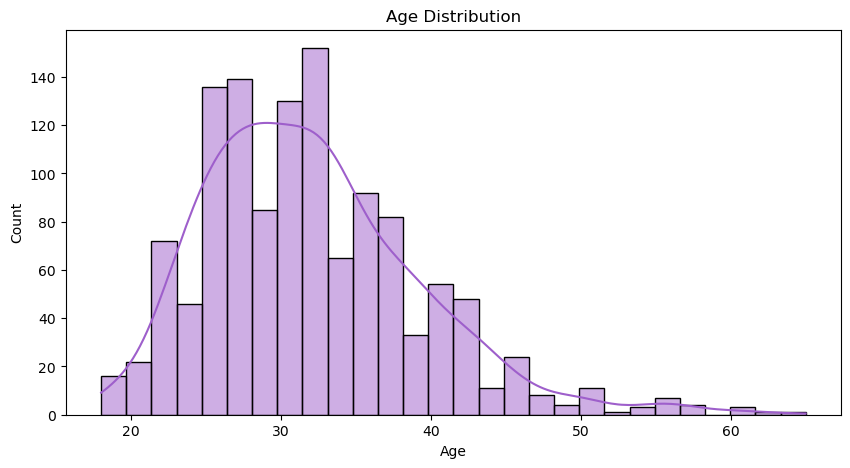

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde=True,bins=28,color="#9E5FCB")
plt.title('Age Distribution')

Text(0.5, 1.0, 'Male vs Female')

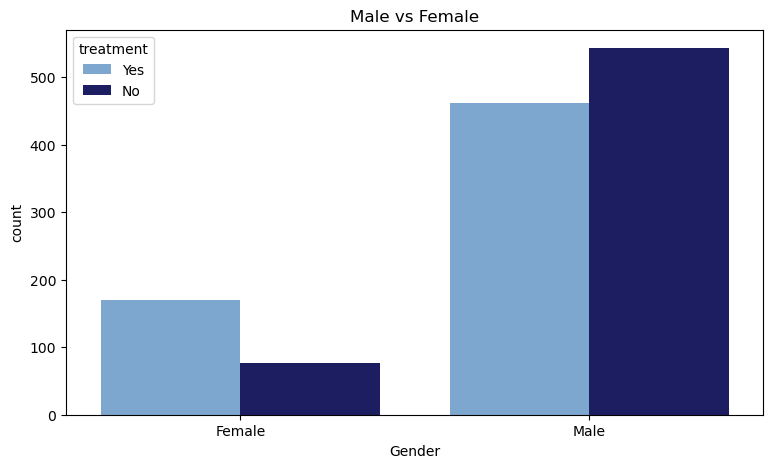

In [23]:
plt.figure(figsize=(9,5))
palette=["#6Fa8DC","#10136D"]
sns.countplot(x=df['Gender'],hue=df['treatment'],palette=palette)
plt.title('Male vs Female')

Text(0.5, 1.0, 'Treatment Distribution (Family History = No)')

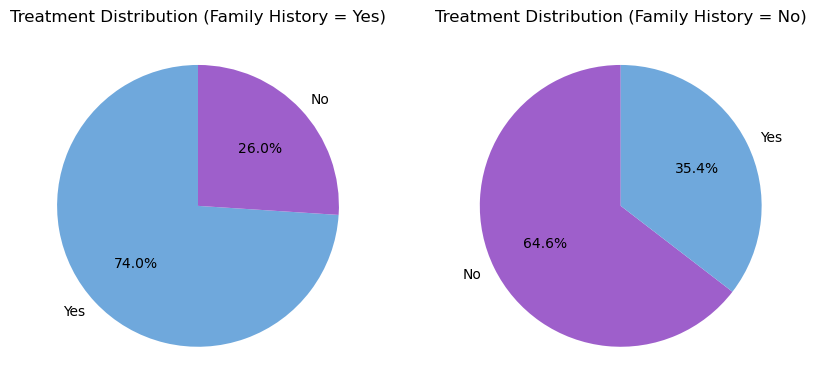

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
palette1=["#9E5FCB",'#6Fa8DC']
palette2 =['#6Fa8DC',"#9E5FCB"]

counts_yes = df[df['family_history'] == 'Yes']['treatment'].value_counts()
ax[0].pie(counts_yes, labels=counts_yes.index, autopct='%1.1f%%', startangle=90,colors=palette2)
ax[0].set_title("Treatment Distribution (Family History = Yes)")

counts_no = df[df['family_history'] == 'No']['treatment'].value_counts()
ax[1].pie(counts_no, labels=counts_no.index, autopct='%1.1f%%', startangle=90,colors=palette1)

ax[1].set_title("Treatment Distribution (Family History = No)")

Text(0.5, 0, 'Availability of Family History with Mental Health Problems')

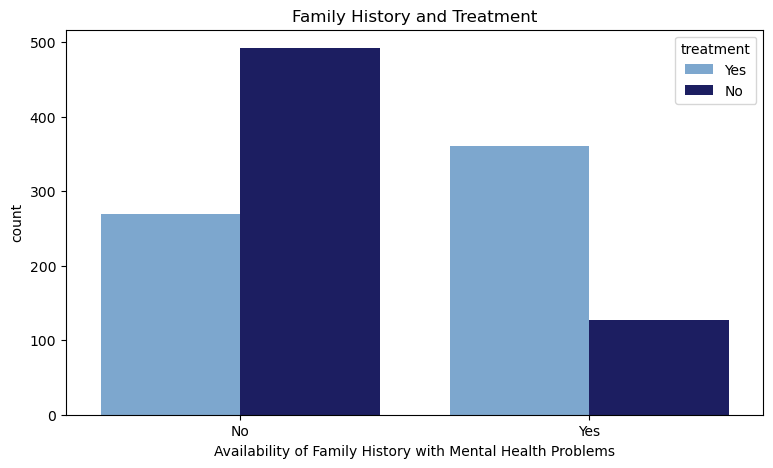

In [25]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df['family_history'],hue=df['treatment'],palette=palette)
plt.title('Family History and Treatment')
plt.xlabel('Availability of Family History with Mental Health Problems')

Text(0.5, 0, ' Availability of Care Options')

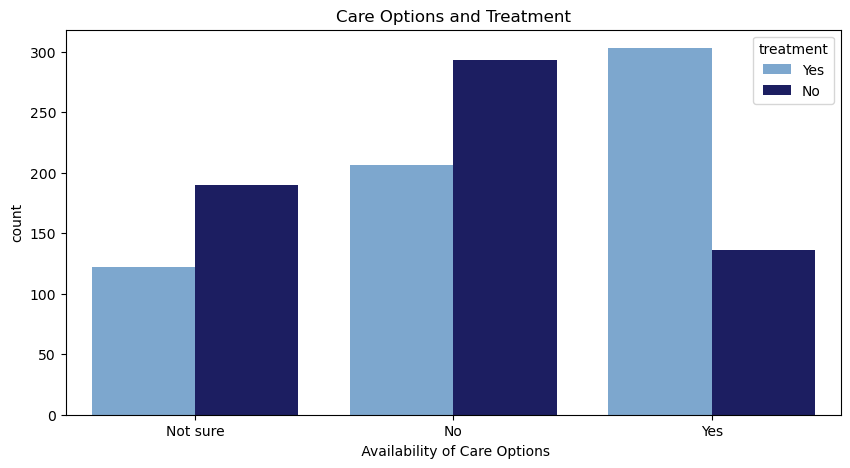

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['care_options'],hue=df['treatment'],palette=palette)
plt.title('Care Options and Treatment')
plt.xlabel(' Availability of Care Options')

Text(0.5, 0, 'Age Group')

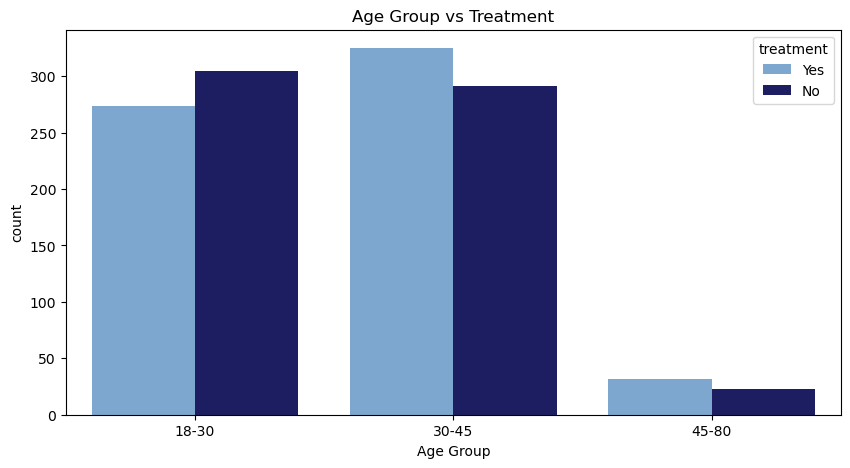

In [27]:
bins=[0,30,45,80]
labels =[('18-30'),('30-45') ,('45-80')]
df_copied=df.copy()
df_copied['age_group']=pd.cut(df_copied['Age'],bins=bins,labels=labels,include_lowest=True)
plt.figure(figsize=(10,5))
sns.countplot(x=df_copied['age_group'],hue=df_copied['treatment'],palette=palette)
plt.title('Age Group vs Treatment')
plt.xlabel('Age Group')

Text(0.5, 0, 'Work Interfere')

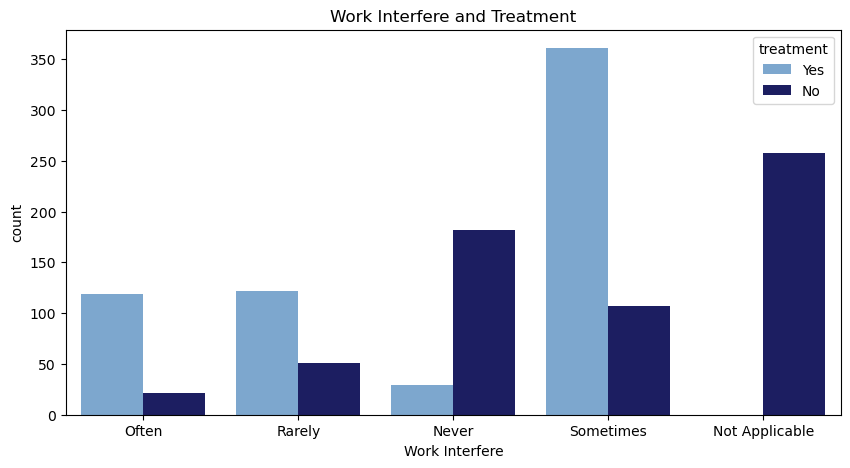

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['work_interfere'],hue=df['treatment'],palette=palette)
plt.title('Work Interfere and Treatment')
plt.xlabel('Work Interfere')

Text(0.5, 1.0, 'Top 10 Countries')

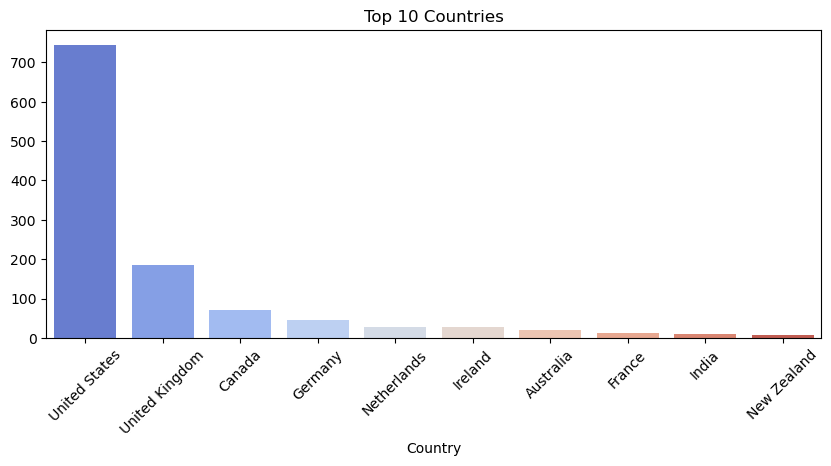

In [29]:
top_countries = df["Country"].value_counts().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries")

In [30]:
from sklearn.preprocessing import OrdinalEncoder

df_encoding = df.copy()

cat_cols = df_encoding.columns.drop(['Country','Age','no_employees'])
df_encoding[cat_cols] = df_encoding[cat_cols].astype(str)
od = OrdinalEncoder()
df_encoding[cat_cols] = od.fit_transform(df_encoding[cat_cols])


In [31]:
from category_encoders import TargetEncoder 

te= TargetEncoder()
df_encoding['Country']= te.fit_transform(df_encoding['Country'],df_encoding['treatment'])

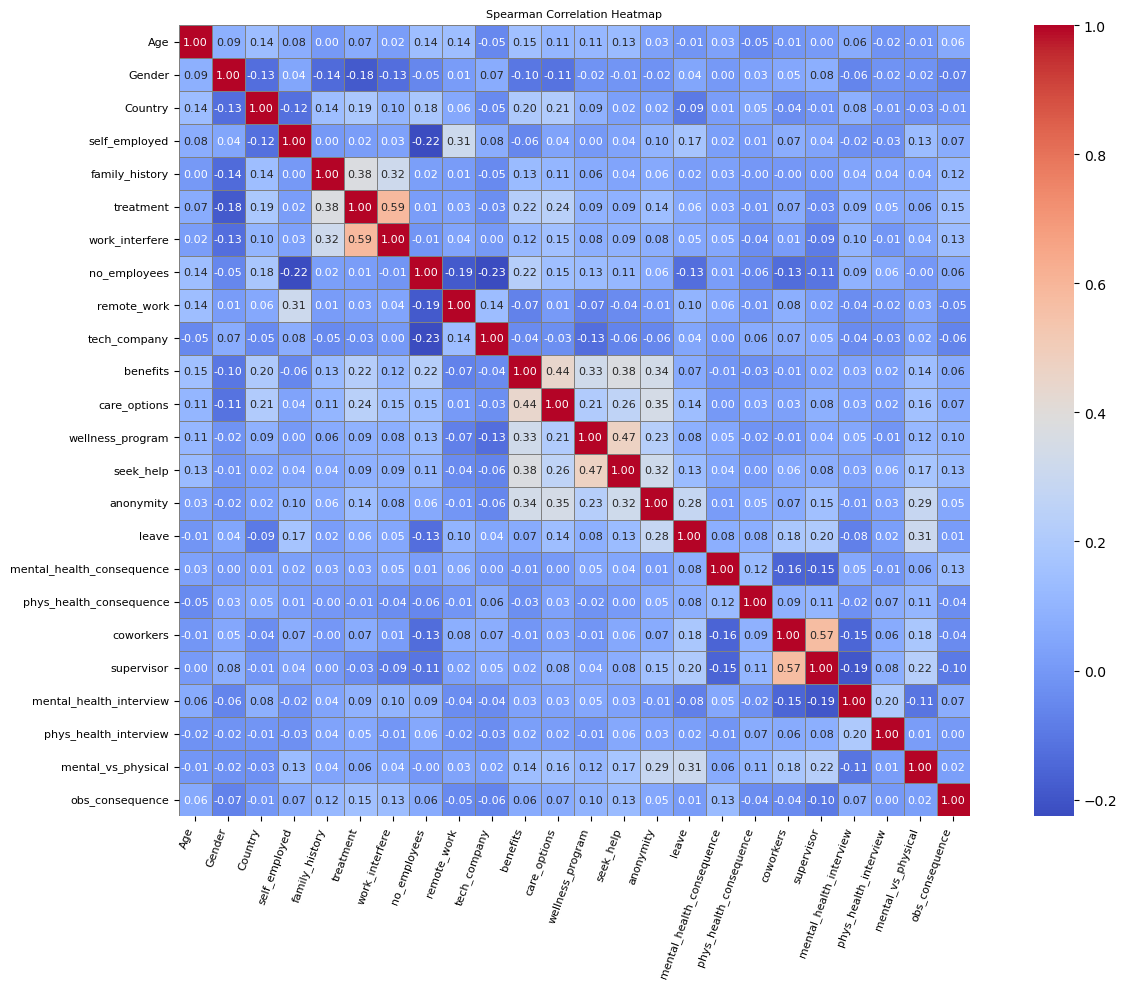

In [32]:
plt.figure(figsize=(14, 10))  
sns.heatmap(
    df_encoding.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size":8} 
)

plt.title("Spearman Correlation Heatmap", fontsize=8)
plt.xticks(rotation=70, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

## 4- Feature Selection

In [33]:
correlation = df_encoding.corr(method="spearman")["treatment"].abs().sort_values(ascending=False)
print(correlation)

treatment                    1.000000
work_interfere               0.572289
family_history               0.376067
care_options                 0.232769
benefits                     0.224420
Gender                       0.184401
Country                      0.160656
obs_consequence              0.151016
anonymity                    0.144256
mental_health_interview      0.094681
wellness_program             0.093025
seek_help                    0.086911
leave                        0.071898
mental_vs_physical           0.070932
coworkers                    0.070142
Age                          0.068120
phys_health_interview        0.049311
supervisor                   0.034721
tech_company                 0.030903
remote_work                  0.025321
mental_health_consequence    0.019651
self_employed                0.016733
no_employees                 0.016322
phys_health_consequence      0.015956
Name: treatment, dtype: float64


In [34]:
X=df_encoding.drop(columns='treatment')
y=df_encoding['treatment']

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
selected_rfe = X.columns[rfe.support_].tolist()
print("RFE selected:", selected_rfe)

RFE selected: ['Gender', 'Country', 'family_history', 'work_interfere', 'benefits', 'care_options', 'seek_help', 'coworkers', 'mental_health_interview', 'obs_consequence']


## 5- Model Training and Evaluation 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

top_features =['Gender', 'Country', 'family_history', 'work_interfere', 'benefits', 'care_options', 'seek_help', 'coworkers', 'mental_health_interview', 'obs_consequence']
X = df_encoding[top_features]
y = df_encoding['treatment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       174
         1.0       0.84      0.78      0.81       201

    accuracy                           0.80       375
   macro avg       0.80      0.80      0.80       375
weighted avg       0.80      0.80      0.80       375



In [38]:
new_example = pd.DataFrame([{
    'Gender': 0.0,
    'Country': 0.546309,
    'family_history': 1.0,
    'work_interfere': 2.0,
    'benefits': 1.0,
    'care_options': 1.0,
    'coworkers': 0.0,
    'mental_health_interview': 0.0,
    'obs_consequence': 0.0,
    'seek_help': 0.1
}])

In [39]:
proba = model.predict_proba(new_example)
prediction = model.predict(new_example)
print("Probability of each class:", proba[0])
print("Predicted target:", prediction[0])

Probability of each class: [0.01884564 0.98115436]
Predicted target: 1.0


Text(0.5, 1.0, 'Confusion Matrix')

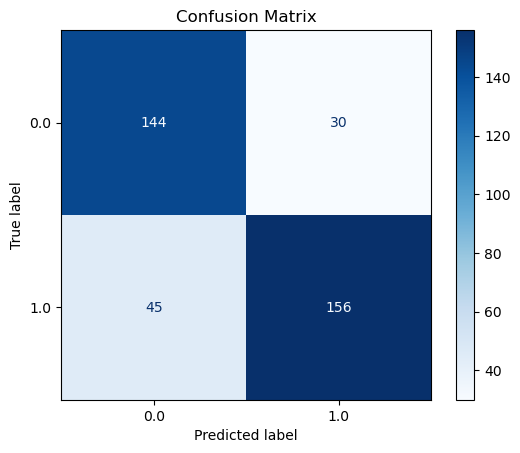

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")


In [41]:
from sklearn.ensemble import RandomForestClassifier

top_features = ['Age', 'Gender', 'Country', 'family_history', 'work_interfere', 'benefits', 'care_options', 'coworkers',
                'mental_health_interview', 'obs_consequence','wellness_program','seek_help' ]
X = df_encoding[top_features]
y = df_encoding['treatment']            


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf = RandomForestClassifier(
    n_estimators=100,        
    max_depth=None,          
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.844
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       124
         1.0       0.85      0.83      0.84       126

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



Text(0.5, 1.0, 'Confusion Matrix')

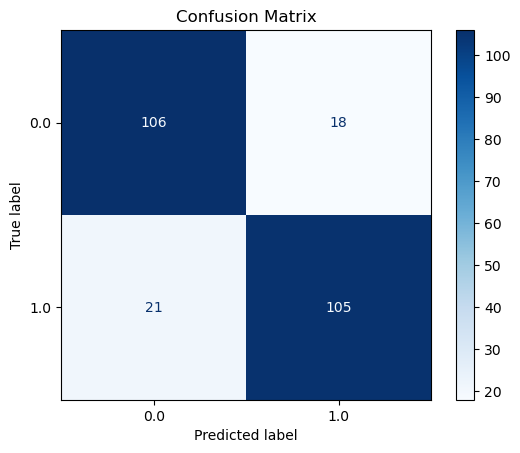

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
